# 촬영 날짜 1991.11.19의 T1 데이터 시각화

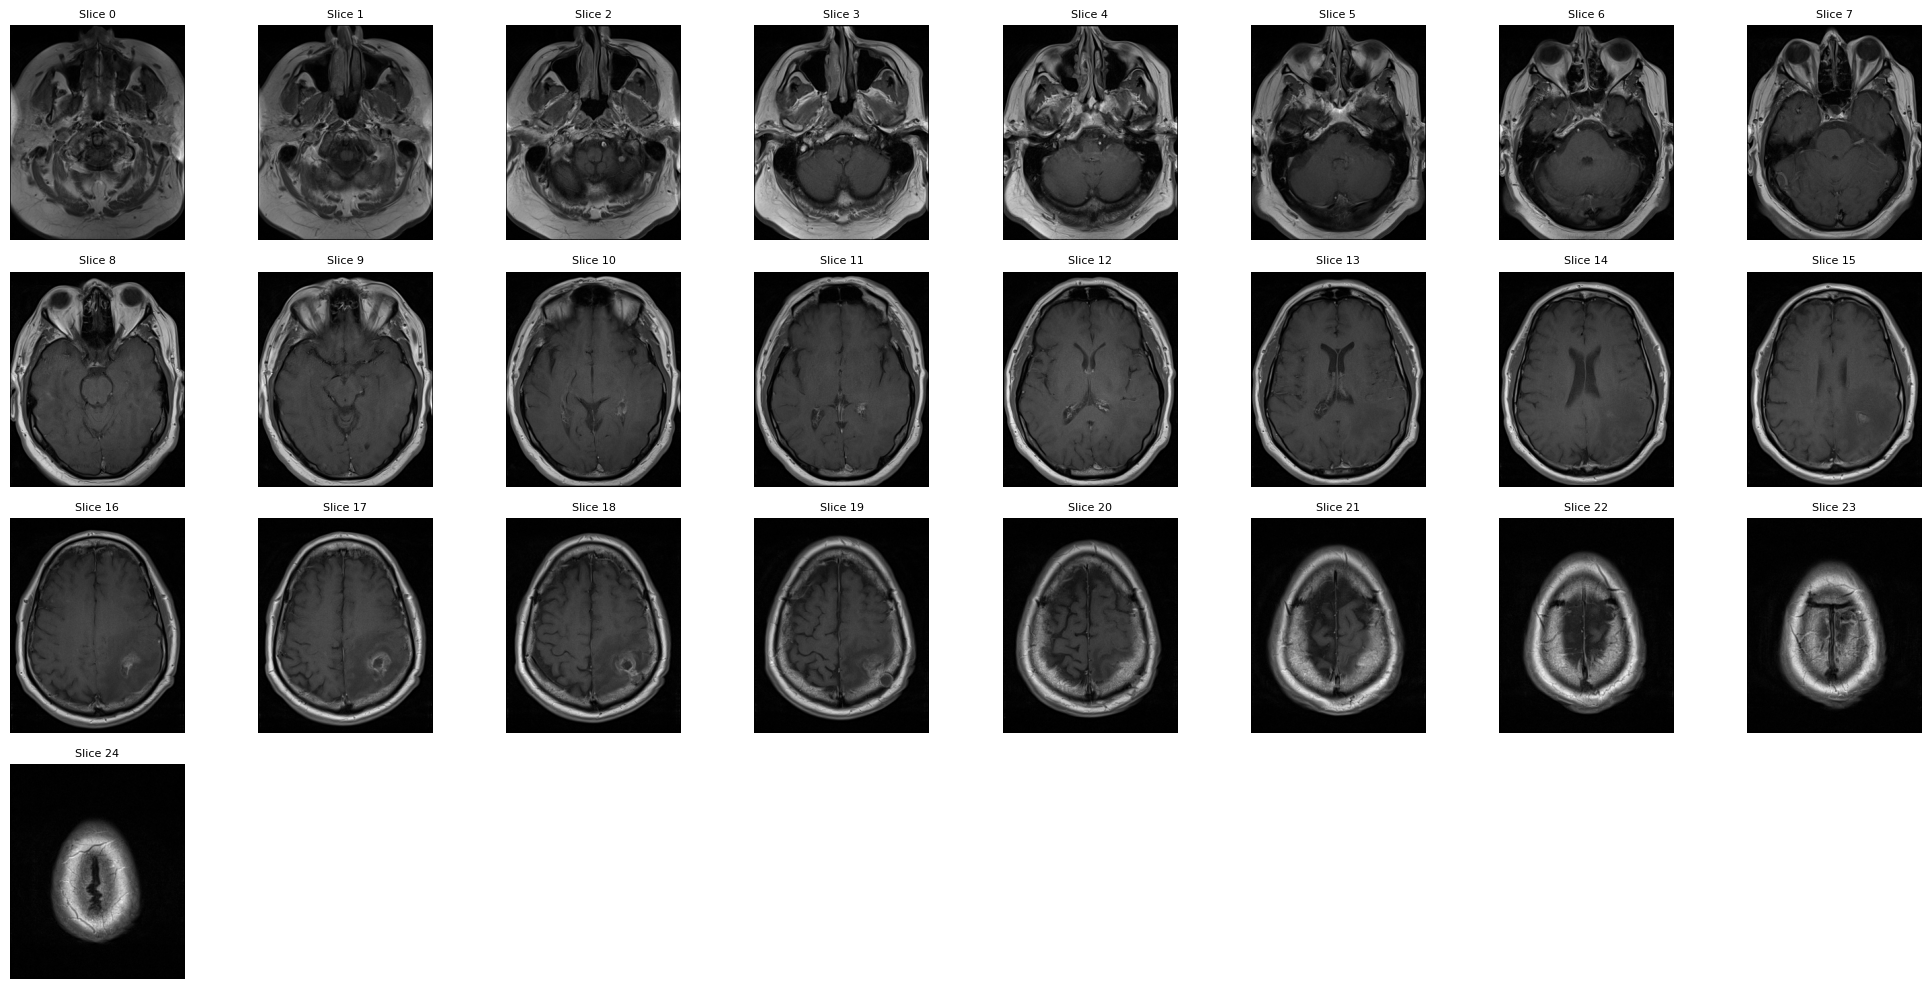

In [4]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

def load_dicom_series_force(folder_path):
    """DICOM 폴더 내 파일들을 직접 불러와서 3D numpy로 변환"""
    reader = sitk.ImageSeriesReader()
    dicom_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]
    
    if len(dicom_files) == 0:
        raise ValueError(f"No .dcm files found in {folder_path}")
    
    dicom_files.sort()
    reader.SetFileNames(dicom_files)
    image = reader.Execute()
    volume = sitk.GetArrayFromImage(image)  # shape: (z, y, x)
    return volume

# 🔹 사용할 시퀀스 경로 (T1post 예시)
dicom_dir = "/mnt/ssd/brain-tumor-prediction/data/raw/Brain-Tumor-Progression/PGBM-001/11-19-1991-FH-HEADBrain Protocols-40993/11.000000-T1post-03326"

# 🔹 볼륨 데이터 로드
volume = load_dicom_series_force(dicom_dir)
num_slices = volume.shape[0]

# 🔹 시각화: 전체 슬라이스를 8xN grid로 출력
cols = 8
rows = int(np.ceil(num_slices / cols))

plt.figure(figsize=(20, 2.5 * rows))
for i in range(num_slices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(volume[i, :, :], cmap='gray')
    plt.title(f"Slice {i}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


# 촬영 날짜 1992.04.02의 T1 시각화

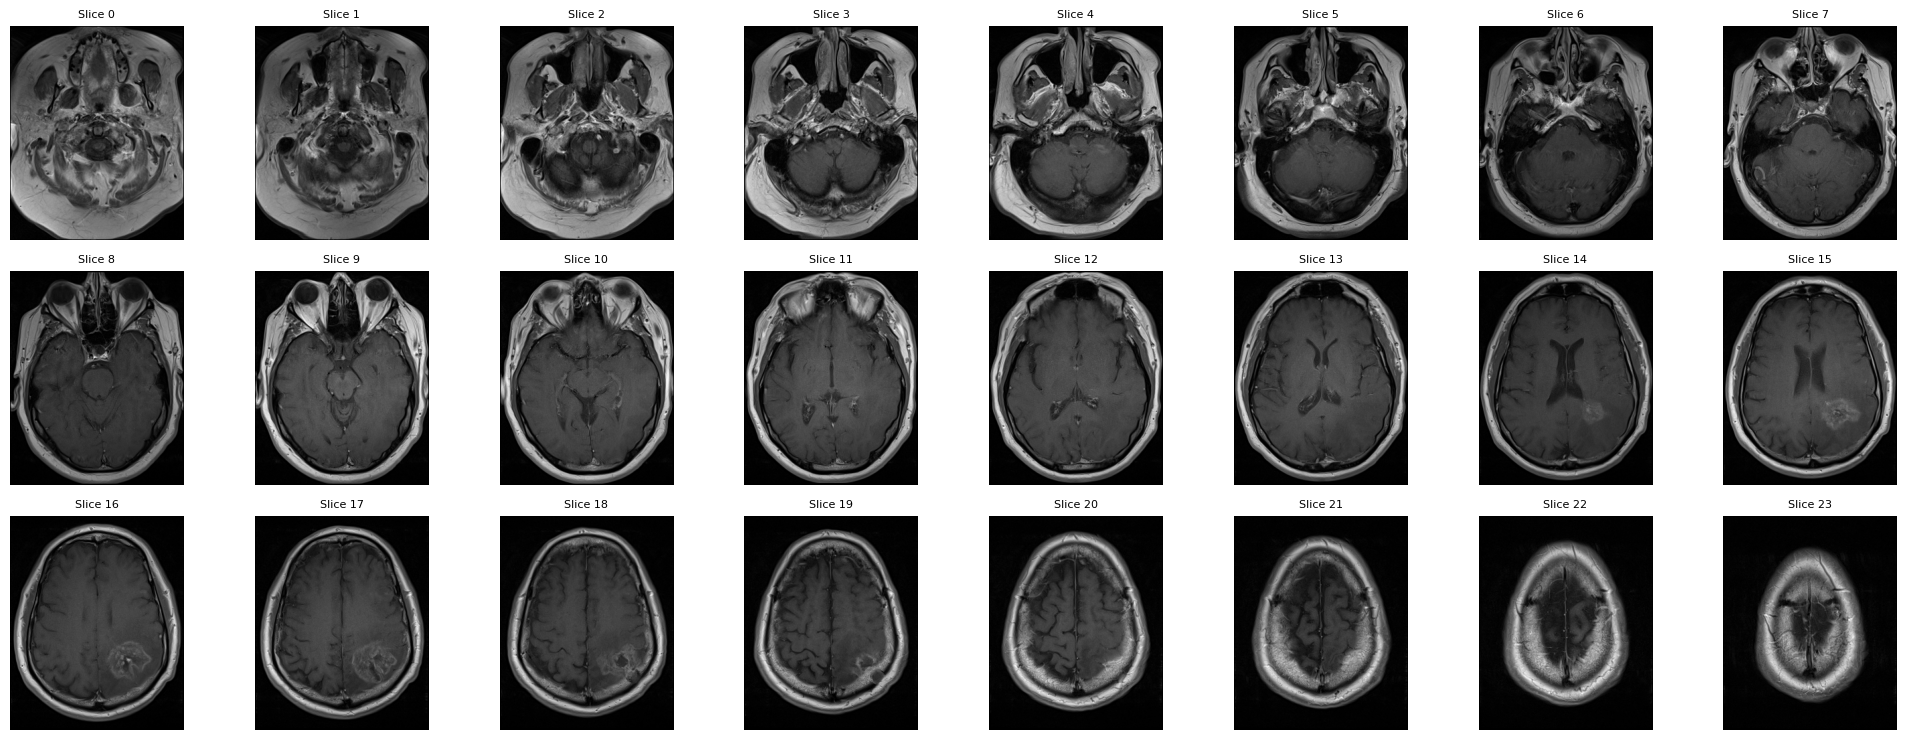

In [3]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

def load_dicom_series_force(folder_path):
    """DICOM 폴더 내 파일들을 직접 불러와서 3D numpy로 변환"""
    reader = sitk.ImageSeriesReader()
    dicom_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]
    
    if len(dicom_files) == 0:
        raise ValueError(f"No .dcm files found in {folder_path}")
    
    dicom_files.sort()
    reader.SetFileNames(dicom_files)
    image = reader.Execute()
    volume = sitk.GetArrayFromImage(image)  # shape: (z, y, x)
    return volume

# 🔹 사용할 시퀀스 경로 (T1post 예시)
dicom_dir = "/mnt/ssd/brain-tumor-prediction/data/raw/Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644"

# 🔹 볼륨 데이터 로드
volume = load_dicom_series_force(dicom_dir)
num_slices = volume.shape[0]

# 🔹 시각화: 전체 슬라이스를 8xN grid로 출력
cols = 8
rows = int(np.ceil(num_slices / cols))

plt.figure(figsize=(20, 2.5 * rows))
for i in range(num_slices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(volume[i, :, :], cmap='gray')
    plt.title(f"Slice {i}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


# 1991.11.19 - 1992.04.02 비교 (가로 나열)

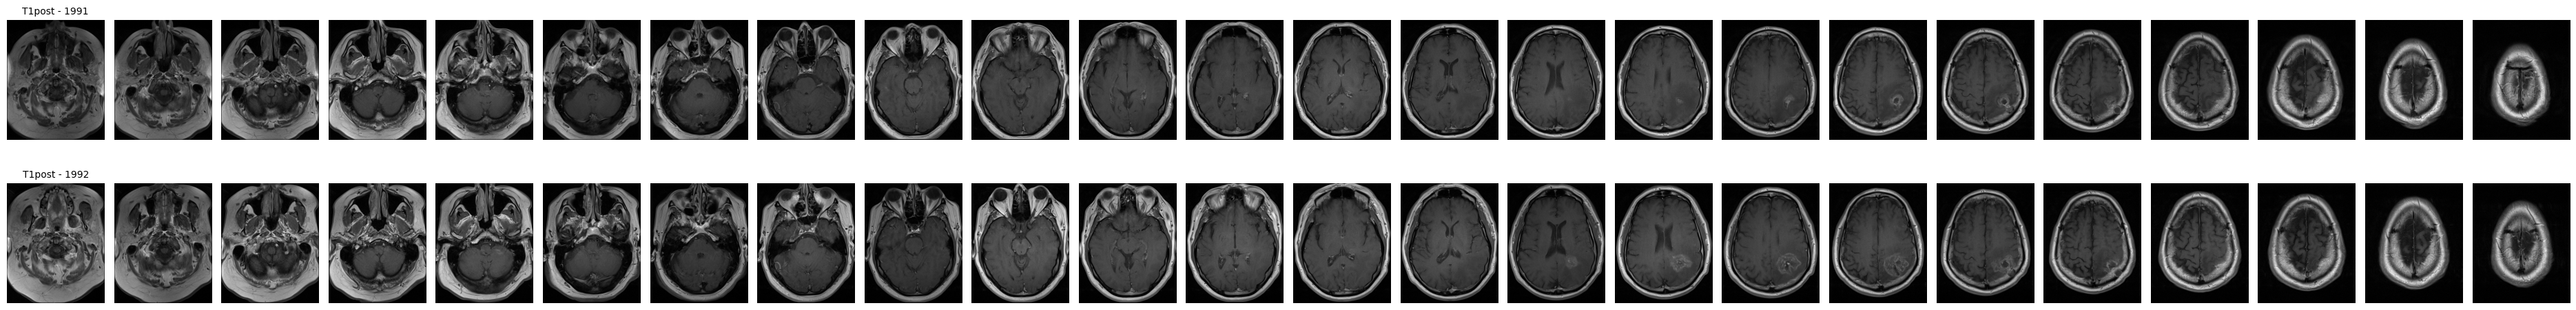

In [ ]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# 🔹 DICOM 볼륨 로딩 함수
def load_dicom_volume(folder_path):
    reader = sitk.ImageSeriesReader()
    dicom_files = sorted([
        os.path.join(folder_path, f)
        for f in os.listdir(folder_path)
        if f.endswith(".dcm")
    ])
    if len(dicom_files) == 0:
        raise ValueError(f"No .dcm files found in {folder_path}")
    
    reader.SetFileNames(dicom_files)
    image = reader.Execute()
    return sitk.GetArrayFromImage(image)  # shape: (z, y, x)

# 🔹 경로 설정
base = "/mnt/ssd/brain-tumor-prediction/data/raw/Brain-Tumor-Progression/PGBM-001"
old_path = os.path.join(base, "11-19-1991-FH-HEADBrain Protocols-40993", "11.000000-T1post-03326")
new_path = os.path.join(base, "04-02-1992-FH-HEADBrain Protocols-79896", "11.000000-T1post-80644")

# 🔹 볼륨 불러오기
old_volume = load_dicom_volume(old_path)
new_volume = load_dicom_volume(new_path)

# 🔹 슬라이스 수 맞추기
slices_to_show = min(old_volume.shape[0], new_volume.shape[0])
rows = 2
cols = slices_to_show

# 🔹 시각화 시작
fig, axes = plt.subplots(rows, cols, figsize=(2.0 * cols, 6), dpi=100)

# 1행: 1991
for i in range(slices_to_show):
    axes[0, i].imshow(old_volume[i, :, :], cmap='gray')
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title("T1post - 1991", fontsize=10)

# 2행: 1992
for i in range(slices_to_show):
    axes[1, i].imshow(new_volume[i, :, :], cmap='gray')
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title("T1post - 1992", fontsize=10)

plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.show()


# 1991.11.19 - 1992.04.02 비교 (세로 나열)

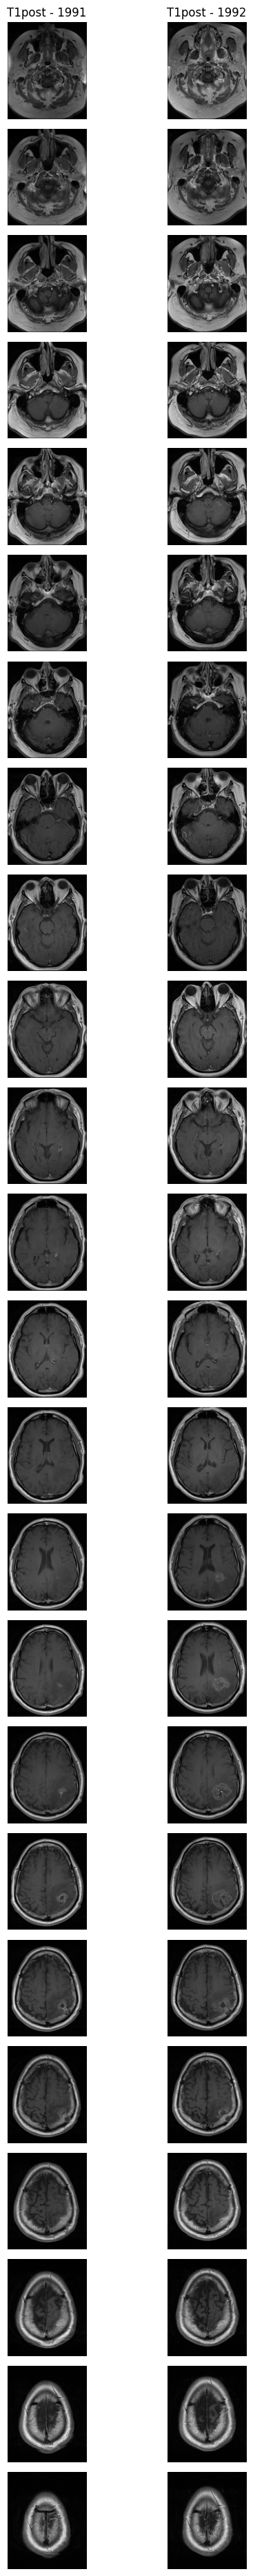

In [ ]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

def load_dicom_volume(folder_path):
    reader = sitk.ImageSeriesReader()
    dicom_files = sorted([
        os.path.join(folder_path, f)
        for f in os.listdir(folder_path)
        if f.endswith(".dcm")
    ])
    if len(dicom_files) == 0:
        raise ValueError(f"No .dcm files found in {folder_path}")
    
    reader.SetFileNames(dicom_files)
    image = reader.Execute()
    return sitk.GetArrayFromImage(image)  # shape: (z, y, x)

# 경로 설정
base = "/mnt/ssd/brain-tumor-prediction/data/raw/Brain-Tumor-Progression/PGBM-001"
old_path = os.path.join(base, "11-19-1991-FH-HEADBrain Protocols-40993", "11.000000-T1post-03326")
new_path = os.path.join(base, "04-02-1992-FH-HEADBrain Protocols-79896", "11.000000-T1post-80644")

# 볼륨 로드
old_volume = load_dicom_volume(old_path)
new_volume = load_dicom_volume(new_path)

# 슬라이스 수 맞춤
num_slices = min(old_volume.shape[0], new_volume.shape[0])

# 출력 설정
slices_to_show = num_slices  # 필요하면 20 등으로 줄이기
cols = 2  # old + new
rows = slices_to_show

plt.figure(figsize=(6, 2 * rows))

for i in range(slices_to_show):
    # 왼쪽 (1991)
    plt.subplot(rows, cols, i * 2 + 1)
    plt.imshow(old_volume[i, :, :], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("T1post - 1991")

    # 오른쪽 (1992)
    plt.subplot(rows, cols, i * 2 + 2)
    plt.imshow(new_volume[i, :, :], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("T1post - 1992")

# 🔽 간격 조절
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()



# 1991.11.19 - 1992.04.02 비교 (Mask를 plt.contour())

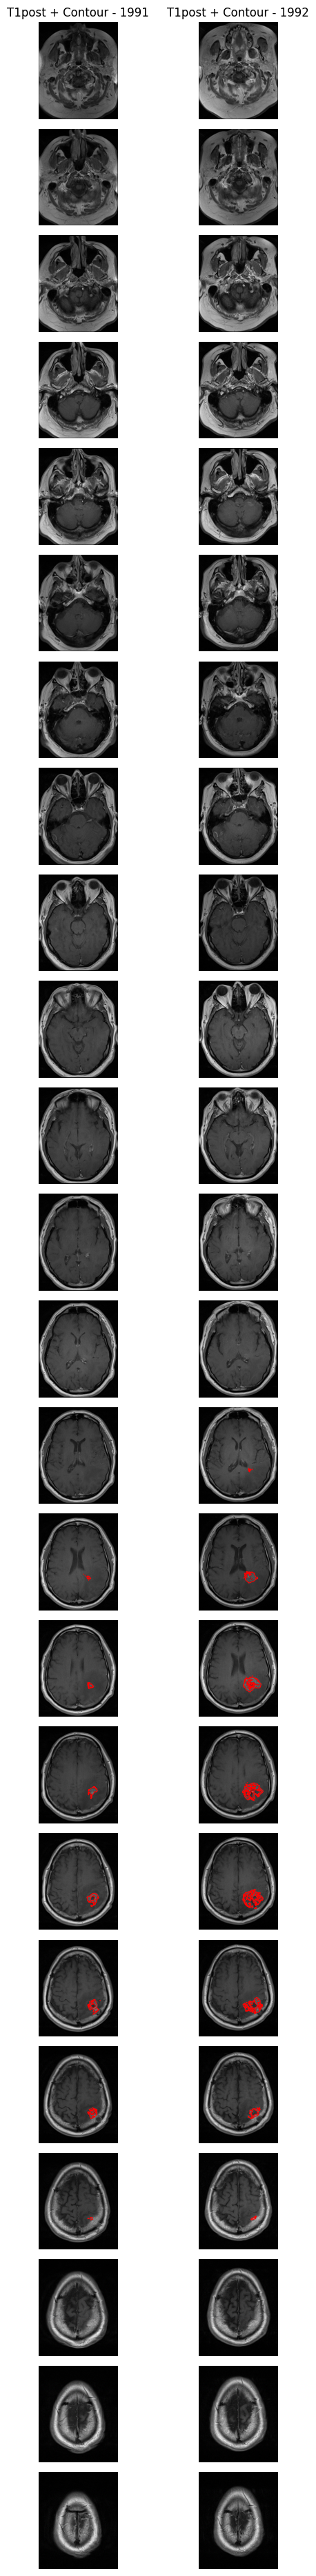

In [20]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

def load_dicom_volume(folder_path):
    reader = sitk.ImageSeriesReader()
    dicom_files = sorted([
        os.path.join(folder_path, f)
        for f in os.listdir(folder_path)
        if f.endswith(".dcm")
    ])
    if len(dicom_files) == 0:
        raise ValueError(f"No .dcm files found in {folder_path}")
    
    reader.SetFileNames(dicom_files)
    image = reader.Execute()
    return sitk.GetArrayFromImage(image)  # shape: (z, y, x)

def normalize_image(img):
    img = img.astype(np.float32)
    return (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-5)

# 경로 설정
base = "/mnt/ssd/brain-tumor-prediction/data/raw/Brain-Tumor-Progression/PGBM-001"

# 이미지 경로
old_path = os.path.join(base, "11-19-1991-FH-HEADBrain Protocols-40993", "11.000000-T1post-03326")
new_path = os.path.join(base, "04-02-1992-FH-HEADBrain Protocols-79896", "11.000000-T1post-80644")

# 마스크 경로
old_mask_path = os.path.join(base, "11-19-1991-FH-HEADBrain Protocols-40993", "5364.000000-MaskTumor-94345")
new_mask_path = os.path.join(base, "04-02-1992-FH-HEADBrain Protocols-79896", "5388.000000-MaskTumor-63335")

# 볼륨 및 마스크 로드
old_volume = load_dicom_volume(old_path)
new_volume = load_dicom_volume(new_path)
old_mask = load_dicom_volume(old_mask_path)
new_mask = load_dicom_volume(new_mask_path)

# 슬라이스 수 맞춤
num_slices = min(old_volume.shape[0], new_volume.shape[0],
                 old_mask.shape[0], new_mask.shape[0])

# 출력 설정
slices_to_show = num_slices
cols = 2
rows = slices_to_show

plt.figure(figsize=(6, 2 * rows))

for i in range(slices_to_show):
    # 왼쪽 (1991)
    plt.subplot(rows, cols, i * 2 + 1)
    plt.imshow(normalize_image(old_volume[i]), cmap='gray')
    plt.contour(old_mask[i], levels=[0.5], colors='red', linewidths=0.7)
    plt.axis('off')
    if i == 0:
        plt.title("T1post + Contour - 1991")

    # 오른쪽 (1992)
    plt.subplot(rows, cols, i * 2 + 2)
    plt.imshow(normalize_image(new_volume[i]), cmap='gray')
    plt.contour(new_mask[i], levels=[0.5], colors='red', linewidths=0.7)
    plt.axis('off')
    if i == 0:
        plt.title("T1post + Contour - 1992")

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()
